# 基础统计(Statistics Fundamentals)

## 读取档案

In [1]:
import random 
import pandas as pd
import numpy as np

# 读取档案
df = pd.read_csv('./data/president_heights.csv')
df.rename(columns={df.columns[-1]:'height'}, inplace=True)

# 观看前 5 笔
df.head() 

,order,name,height
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


## 描述统计量(Descriptive Statistics)

In [2]:
# 集中趋势(Central Tendency)
print(f"平均数={df['height'].mean()}")
print(f"中位数={df['height'].median()}")
print(f"众  数={df['height'].mode()[0]}")
print()

# 资料离散的程度(Measures of Variance)
from scipy import stats

print(f"级距(Range)={df['height'].max() - df['height'].min()}")
print(f"182cm 百分位数={stats.percentileofscore(df['height'], 182, 'strict')}")
print(f"变异数={df['height'].std():.2f}")

平均数=179.73809523809524
中位数=182.0
众  数=183

级距(Range)=30
182cm 百分位数=47.61904761904761
变异数=7.02


## 四分位数(Quartiles)

In [3]:
print(f"四分位数\n{df['height'].quantile([0.25, 0.5, 0.75, 1])}")

四分位数
0.25    174.25
0.50    182.00
0.75    183.00
1.00    193.00
Name: height, dtype: float64


## 常见描述统计量

In [4]:
print(f"{df['height'].describe()}")

count     42.000000
mean     179.738095
std        7.015869
min      163.000000
25%      174.250000
50%      182.000000
75%      183.000000
max      193.000000
Name: height, dtype: float64


## 箱形图(box plot)或盒须图

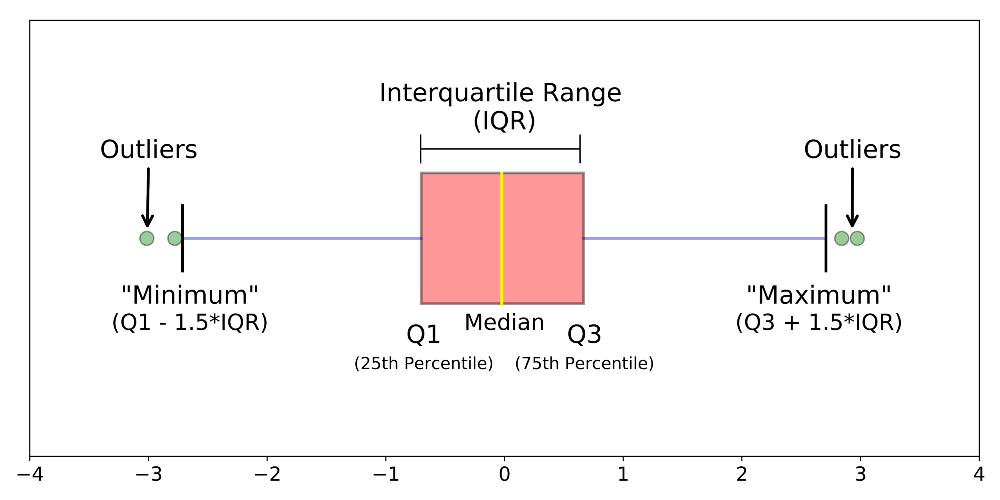

In [5]:
from IPython.display import Image
Image('./images/Boxplot.png', width=800)

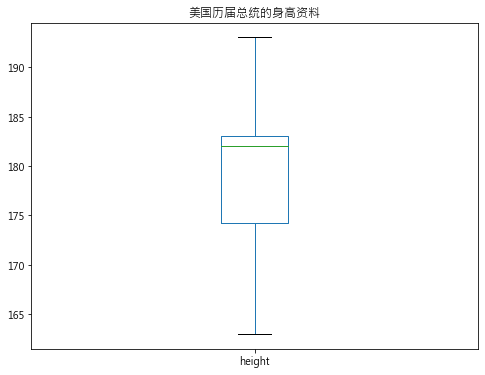

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

df['height'].plot(kind='box', title='美国历届总统的身高资料', figsize=(8,6))
plt.show()

C:\Users\Ariel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


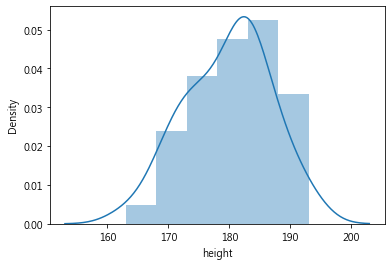

In [7]:
# 直方图
import seaborn as sns

# 绘图
sns.distplot(df['height'])
plt.show()

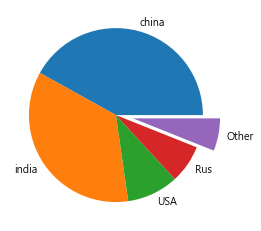

In [8]:
# 饼图(Pie Chart)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 读取资料档
df = pd.read_csv('./data/gdp.csv')

# 转为整数栏位
df.pop = df['pop'].astype(int)

# 取最大 5 笔
df2 = df.nlargest(5, 'pop')

# 散布图(Scatter Chart) 
plt.pie(df2['pop'], explode=[0, 0,0,0,0.2], labels=['china', 'india', 'USA', 'Rus', 'Other'])

plt.show()

C:\Users\Ariel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


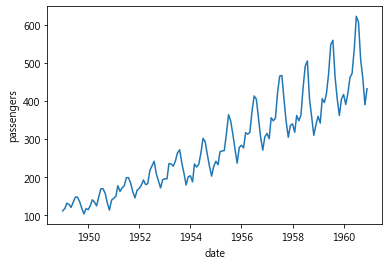

In [9]:
# 线图(Line Chart)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 读取资料档
df = pd.read_csv('./data/airline.csv')

# 转为日期栏位
df['date'] = pd.to_datetime(df['date'])

# 绘图
sns.lineplot(df['date'], df['passengers'])

plt.show()

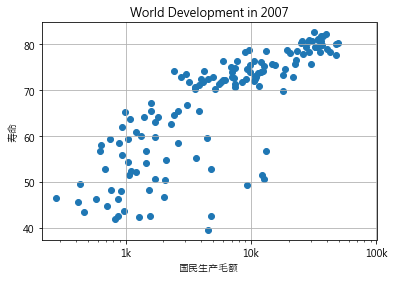

In [10]:
# 散布图(Scatter Chart) 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 读取资料档
df = pd.read_csv('./data/gdp.csv')

# 转为整数栏位
df.pop = df['pop'].astype(int)

# 绘制散布图(Scatter Chart) 
plt.scatter(x = df.gdp, y = df.life_exp)

# 设定绘图属性
plt.xscale('log') 
plt.xlabel('国民生产毛额')
plt.ylabel('寿命')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])
plt.grid()

plt.show()

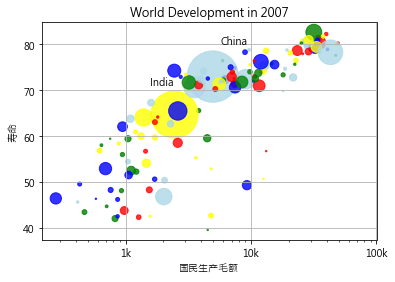

In [11]:
# 气泡图(Bubble Chart)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 读取资料档
df = pd.read_csv('./data/gdp.csv')

# 转为整数栏位
df.pop = df['pop'].astype(int)

# 绘制散布图(Scatter Chart) + 加一个变数 pop，作为点的大小
col=np.resize(['red', 'green', 'blue', 'yellow', 'lightblue'], df.shape[0])
plt.scatter(x = df.gdp, y = df.life_exp, s = df.pop * 2, c = col, alpha = 0.8)

# 设定绘图属性
plt.xscale('log') 
plt.xlabel('国民生产毛额')
plt.ylabel('寿命')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])
plt.grid()

# 加注
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

plt.show()

## 关联系数(Correlation coefficient)
$\begin{equation}r_{x,y} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})(y_{i} -\bar{y})}{\sqrt{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}(y_{i} -\bar{y})^{2}}}\end{equation}$

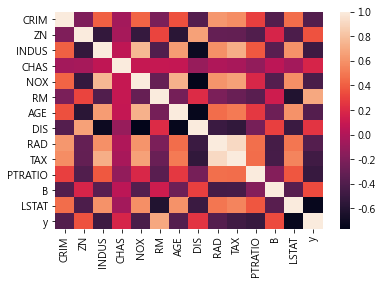

In [12]:
# 热力图(Heatmap)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# 读取 sklearn 内建资料档
ds = datasets.load_boston()

df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['y'] = ds.target


# 绘制热力图(Heatmap)
# df.corr()：关联系数(Correlation coefficient)
sns.heatmap(df.corr())

plt.show()

In [3]:
# pairplot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# 读取 sklearn 内建资料档
ds = datasets.load_iris()

df = pd.DataFrame(ds.data, columns=ds.feature_names)
df['y'] = ds.target


# 绘图
sns.pairplot(df)

plt.show()

ModuleNotFoundError: No module named 'seaborn'